In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cleaned_data.csv', sep=';')

In [3]:
np.shape(df)

(2477, 11)

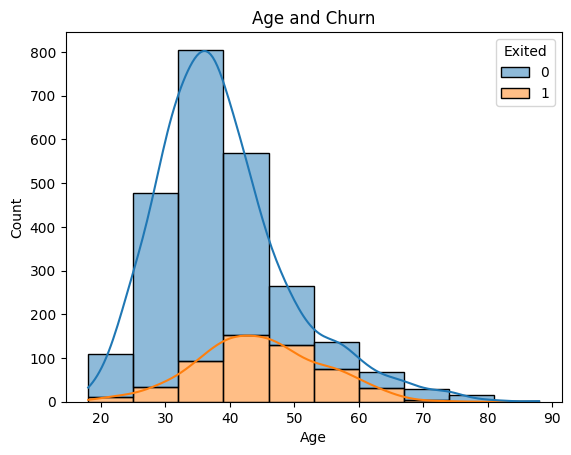

In [4]:
sns.histplot(data=df, x="Age", hue='Exited',multiple='stack', bins=10, kde=True)
plt.title('Age and Churn')
plt.show()

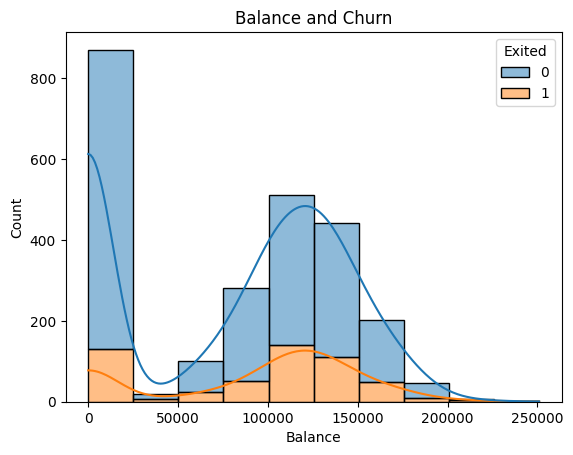

In [5]:
sns.histplot(data=df, x="Balance", hue='Exited',multiple='stack', bins=10, kde=True)
plt.title('Balance and Churn')
plt.show()

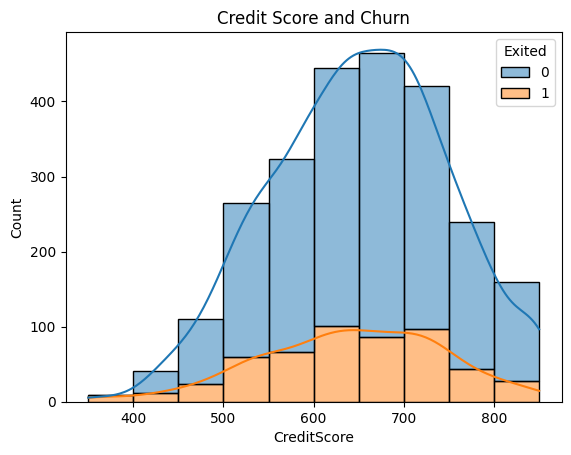

In [6]:
sns.histplot(data=df, x="CreditScore", hue='Exited',multiple='stack', bins=10, kde=True)
plt.title('Credit Score and Churn')
plt.show()

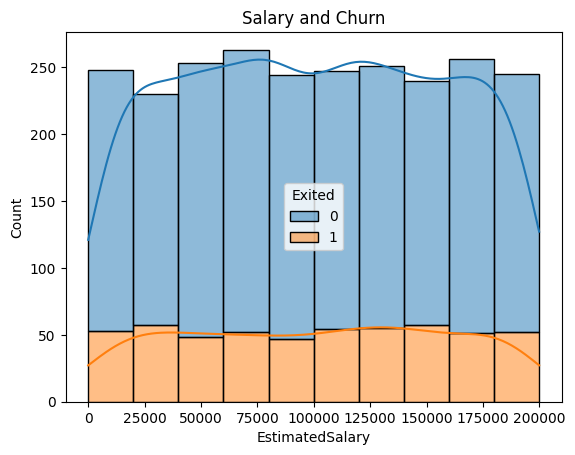

In [7]:
sns.histplot(data=df, x="EstimatedSalary", hue='Exited',multiple='stack', bins=10, kde=True)
plt.title('Salary and Churn')
plt.show()

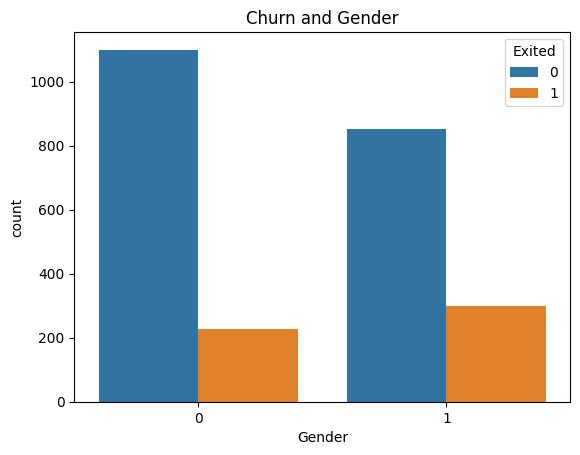

In [8]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Churn and Gender')
plt.show()

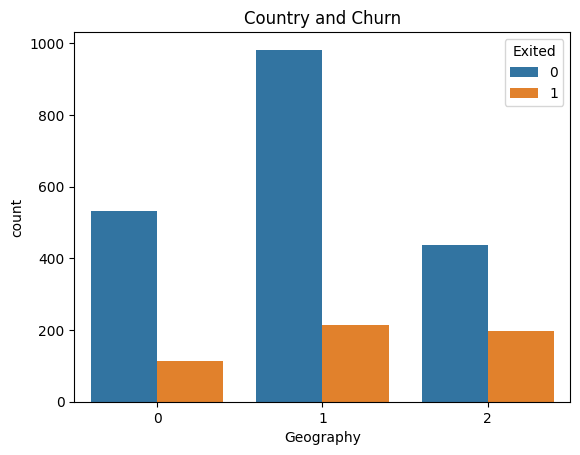

In [9]:
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title('Country and Churn')
plt.show()

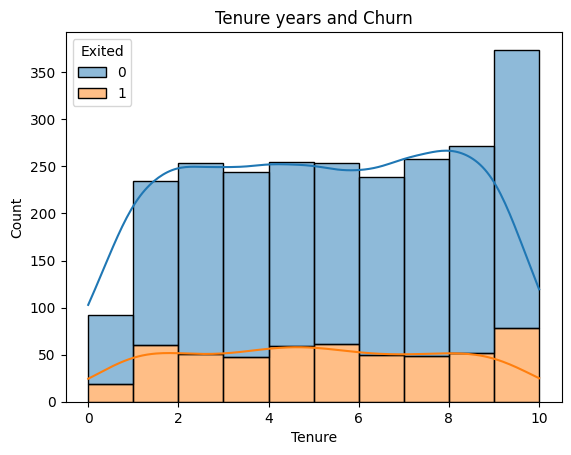

In [10]:
sns.histplot(data=df, x='Tenure', hue='Exited', multiple='stack', bins=10, kde=True)
plt.title('Tenure years and Churn')
plt.show()

In [11]:
train_df = df.sample(frac=0.8, random_state=42)
test_df= df.drop(train_df.index)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
def split(df):
    X = np.array(df.drop(columns='Exited', axis=1))
    y = np.array(df['Exited'])

    return X, y

In [14]:
X_train, y_train = split(train_df)
X_test, y_test = split(test_df)

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
model = XGBClassifier(n_estimators=75, random_state=42, max_depth=7,learning_rate=0.1, use_label_encoder = False)
model.fit(X_train, y_train)

C:\Users\callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [21:56:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [17]:
y_pred = model.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       388
           1       0.72      0.47      0.57       107

    accuracy                           0.85       495
   macro avg       0.80      0.71      0.74       495
weighted avg       0.84      0.85      0.83       495



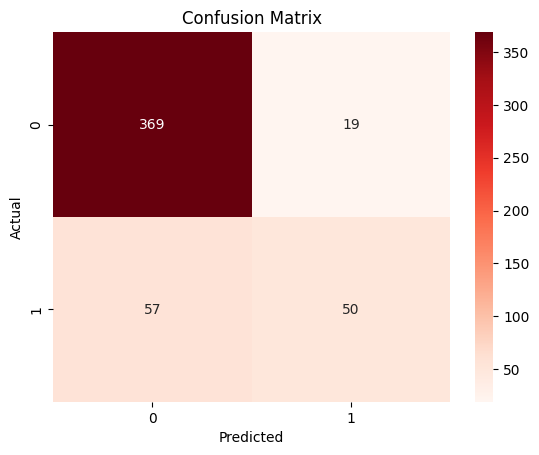

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
model.get_booster().feature_names
importance = pd.Series(model.feature_importances_)

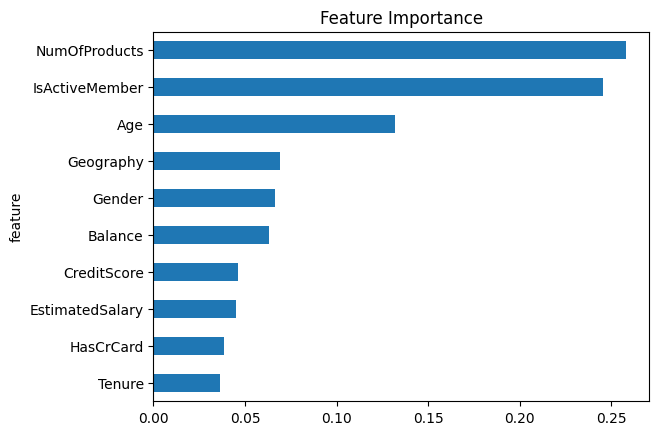

In [21]:
X=df.drop('Exited', axis=1)
importance = model.feature_importances_

importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importance
})
importance_df.sort_values("importance").plot(
    kind="barh", x="feature", y="importance", legend=False
)
plt.title("Feature Importance")
plt.show()
